**Lesson exercise notebook for Spark-for-Machine-Learning-AI Course**
* Created by Kevin Chao (kevinchao@gmail.com)
* Latest updated on Feb 14, 2024

* Data: Combined Cycle Power Plant over 6 years (2006-2011)
    * Ambient Temperature (AT)
    * Exhaust Vacuum (V)
    * Ambient Pressure (AP)
    * Relative Humidity (RH)
    * Power Energy (PE)

In [31]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("YourAppName").getOrCreate()

import pandas as pd
import matplotlib.pyplot as plt

from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [28]:
# First load xlsx file with Pandas
df = pd.read_excel('Exercise_Files/CCPP/Folds5x2_pp.xlsx', sheet_name='Sheet1')

# Convert Pandas dataframe to Spark dataframe
pp_df = spark.createDataFrame(df)

In [30]:
pp_df

DataFrame[AT: double, V: double, AP: double, RH: double, PE: double]

In [29]:
pp_df.show(5)

+-----+-----+-------+-----+------+
|   AT|    V|     AP|   RH|    PE|
+-----+-----+-------+-----+------+
|14.96|41.76|1024.07|73.17|463.26|
|25.18|62.96|1020.04|59.08|444.37|
| 5.11| 39.4|1012.16|92.14|488.56|
|20.86|57.32|1010.24|76.64|446.48|
|10.82| 37.5|1009.23|96.62| 473.9|
+-----+-----+-------+-----+------+
only showing top 5 rows



Text(0, 0.5, 'PE')

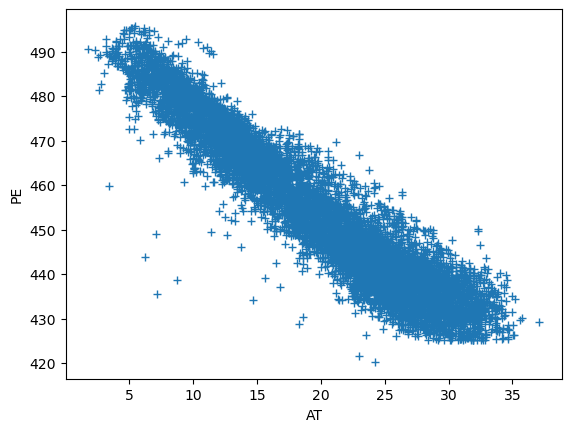

In [26]:
plt.plot(df.AT, df.PE, '+')
plt.xlabel('AT')
plt.ylabel('PE')

In [33]:
vectorAssembler = VectorAssembler(inputCols=["AT", "V", "AP", "RH"], outputCol="features")

In [34]:
vpp_df = vectorAssembler.transform(pp_df)

In [35]:
vpp_df.take(1)

[Row(AT=14.96, V=41.76, AP=1024.07, RH=73.17, PE=463.26, features=DenseVector([14.96, 41.76, 1024.07, 73.17]))]

In [36]:
lr = LinearRegression(featuresCol="features", labelCol="PE")

In [39]:
lr_model = lr.fit(vpp_df)

24/02/12 14:02:07 WARN Instrumentation: [1ecdd0d3] regParam is zero, which might cause numerical instability and overfitting.


In [40]:
lr_model.coefficients

DenseVector([-1.9775, -0.2339, 0.0621, -0.1581])

In [41]:
lr_model.intercept  # An intercept crossing the y-axis

454.60927431258665

In [42]:
lr_model.summary.rootMeanSquaredError  # How much errors are in our prediction

4.557126016749482

In [44]:
# Save our model
lr_model.save("Exercise_Files/lr1.model")